In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

seed: 1752725650
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.9131, node: CCn1cc([C@H](C)[NH2+][C@@H](C)c2sc(C)nc2C)cn1
<Best reward updated> 10 - time: 0.14, reward: 0.9184, node: O=C1C[NH+](C[C@@H]2COc3ccccc32)Cc2ccccc2S1
100 - time: 1.29, average over 100: 0.7330
<Best reward updated> 103 - time: 1.32, reward: 0.9242, node: C[NH2+][C@@H](Cc1ccc(Cl)cc1)[C@@H]1CCCc2cccnc21
<Best reward updated> 119 - time: 1.52, reward: 0.9335, node: Oc1cn(Cc2ccc(F)cc2Cl)nc1N1CCCCCC1
<Best reward updated> 175 - time: 2.14, reward: 0.9429, node: O=S(=O)(Cc1ccccc1)Nc1ncccc1C(F)(F)F
<Best reward updated> 178 - time: 2.18, reward: 0.9438, node: O=S(=O)(NC1CC(n2cccc2)C1)c1ccccc1Cl
200 - time: 2.50, average over 100: 0.6985
300 - time: 3.55, average over 100: 0.7186
400 - time: 4.74, average over 100: 0.7116
500 - time: 5.91, average over 100: 0.7217
600 - time: 7.16, average over 100: 0.7331
700 - time: 8.34, average over 100: 0.6987
<Best reward updated> 760 - time: 8.99, reward:

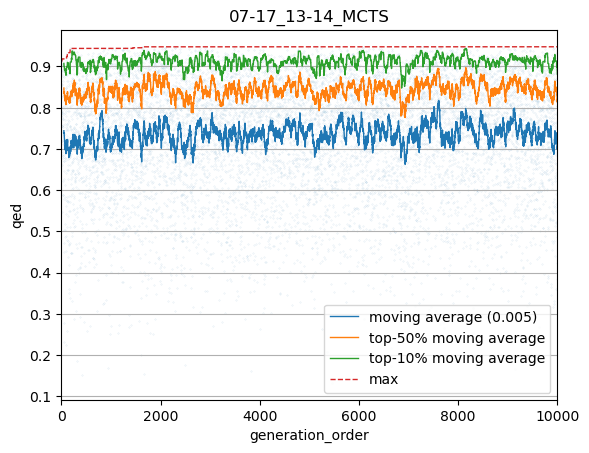

number of generated nodes: 10000
valid rate: 0.7355311355311356
unique rate: 0.9970695970695971
node_per_sec: 84.4868307066333
best_reward: 0.9478097158278044
average_reward: 0.7363211386878349
top_10_auc: 0.9395534174726067


In [3]:
# start generation

# yaml_path = "config/mcts_helm.yaml"
# yaml_path = "config/mcts_smiles.yaml"
# yaml_path = "config/model_test.yaml"
# yaml_path = "config/mcts_d_score.yaml"
# yaml_path = "config/mcts_biot5.yaml"
# yaml_path = "config/mcts_smirks.yaml"
# yaml_path = "config/mcts_jensen.yaml"
# yaml_path = "config/heapq_smiles.yaml"
yaml_path = "config/mol_opt/_test.yaml"

conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

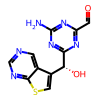

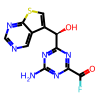

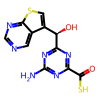

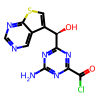

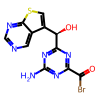

In [4]:
from utils import draw_mol
for c in generator.root.children:
    draw_mol(c.mol(), 100, 100)

In [ ]:
# continue generation
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator = generator_from_conf(conf, repo_root)
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)